# Model Validation and coefficient calculation

Marc Pérez  
May 22, 2025

## Context

To explore, whether the proposed mechanisms and experiments to assess their dynamic, in a first step the Treatment levels $0P$ and $166P$ for all sites were analyzed. The experiments were conducted as displayed in the original paper of Flossmann & Richter with adjustments according to developments in technique and available equipment of the soil laboratory. Instead of the CAL-method, the Olsen-method was used to measure and estimate the quantity of P.

## Model of P-release after Flossman & Richter

$$\frac{dP}{dt}=k\times(P^S-P)$$ The constant $P^S$ denotes the amount of semi-labile P and was originally estimated as $P_\text{Olsen}-P_{H_2O}$. Subsequently the DE is solved exactly, since the soil is as $t=0$ mixed with deionized water, it was assumed that $P(0)=0$

## Exact Solution

$$P(t)=P^{\text{S}}-C\times e^{-kt}$$

for $P(0)=P_0$ we receive:

$$P(t)=P^S-(P^S-P_0)\times e^{-kt}$$

If we set $P(0)=0$ we receive:

$$P(t)=P^S\times(1-e^{-kt})q$$

## Linearization

Now we linearize the DE, so that a linear model can be employed to test the relation and estimate the parameters of interest:

$$P(t)=P^S-(P^S-P_0)\times e^{-kt}$$

$$P(t)-P^S=-(P^S-P_0)\times e^{-kt}$$

$$P^S-P(t)=(P^S-P_0)\times e^{-kt}$$

$$1-\frac{P(t)}{P^S}=(1-\frac{P_0}{P^S})\times e^{-kt}$$

Given $P_0=0$,

$$log(1-\frac{P(t)}{P^S})=-kt$$

## Setup and preparation of dataset

In [ ]:
#| include: false
#| message: false
#| warning: false

RES <- list()

library(multcomp)

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser

Loading required package: carData

Loading required package: Matrix


Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: 'ggpp'

The following object is masked from 'package:ggplot2':

    annotate


Attaching package: 'nlme'

The following object is masked from 'package:lme4':

    lmList


Attaching package: 'dplyr'

The following object is masked from 'package:kableExtra':

    group_rows

The following object is masked from 'package:nlme':

    collapse

The following object is masked from 'package:car':

    recode

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

'data.frame':   394 obs. of  21 variables:
 $ Site              : chr  "Cadenazzo" "Cadenazzo" "Cadenazzo" "Cadenazzo" ...
 $ Treatment         : Factor w/ 3 levels "P0","P100","P166": 1 1 1 1 1 1 1 1 1 1 ...
 $ Repetition        : Factor w/ 4 levels "1","2","3","4": 2 2 2 2 2 2 1 1 1 1 ...
 $ Nummer            : num  1 1 1 1 1 1 2 2 2 2 ...
 $ mSoil_Olsen.g.    : chr  "10.05" "10.05" "10.05" "10.05" ...
 $ mSoil_H2O.g.      : num  10.3 10.3 10.3 10.3 10.3 ...
 $ Abs_labile.1.     : chr  "0.26" "0.26" "0.26" "0.26" ...
 $ Abs_Olsen.1.      : chr  "1.02" "1.02" "1.02" "1.02" ...
 $ Abs_Olsen1_10.1.  : chr  "0.28" "0.28" "0.28" "0.28" ...
 $ t.min.            : num  5 10 20 30 45 60 5 10 20 30 ...
 $ Abs.1.            : num  0.21 0.22 0.23 0.24 0.26 0.25 0.22 0.24 0.25 0.27 ...
 $ Pv_labile.mg.L.   : num  0.05 0.05 0.05 0.05 0.05 0.05 0.06 0.06 0.06 0.06 ...
 $ Pv_Olsen.mg.L.    : num  0.35 0.35 0.35 0.35 0.35 0.35 0.42 0.42 0.42 0.42 ...
 $ Pv_Olsen1_10.mg.L.: chr  "0.46" "0.46" "0.46" 

Now we can see, whether our linearized model displays a linear relation.

Call:
  Model: Y1 ~ t.min. | uid 
   Data: d[d$Repetition == 1 | d$Repetition == 2, ] 

Coefficients:
   (Intercept) 
                      Estimate Std. Error    t value     Pr(>|t|)
Cadenazzo_P0_1     -0.12891945 0.01537006  -8.387702 4.332766e-12
Cadenazzo_P0_2     -0.12037045 0.01537006  -7.831491 4.433395e-11
Cadenazzo_P100_1            NA         NA         NA           NA
Cadenazzo_P100_2            NA         NA         NA           NA
Cadenazzo_P166_1   -0.26932199 0.01537006 -17.522512 6.499702e-27
Cadenazzo_P166_2   -0.19243796 0.01537006 -12.520316 2.550625e-19
Ellighausen_P0_1   -0.10464296 0.01537006  -6.808236 3.136905e-09
Ellighausen_P0_2   -0.11438112 0.01537006  -7.441815 2.257472e-10
Ellighausen_P100_1          NA         NA         NA           NA
Ellighausen_P100_2          NA         NA         NA           NA
Ellighausen_P166_1          NA         NA         NA           NA
Oensingen_P0_1     -0.03432646 0.01537006  -2.233333 2.882091e-02
Oensingen_P0_2     -0.05

`geom_smooth()` using formula = 'y ~ x'

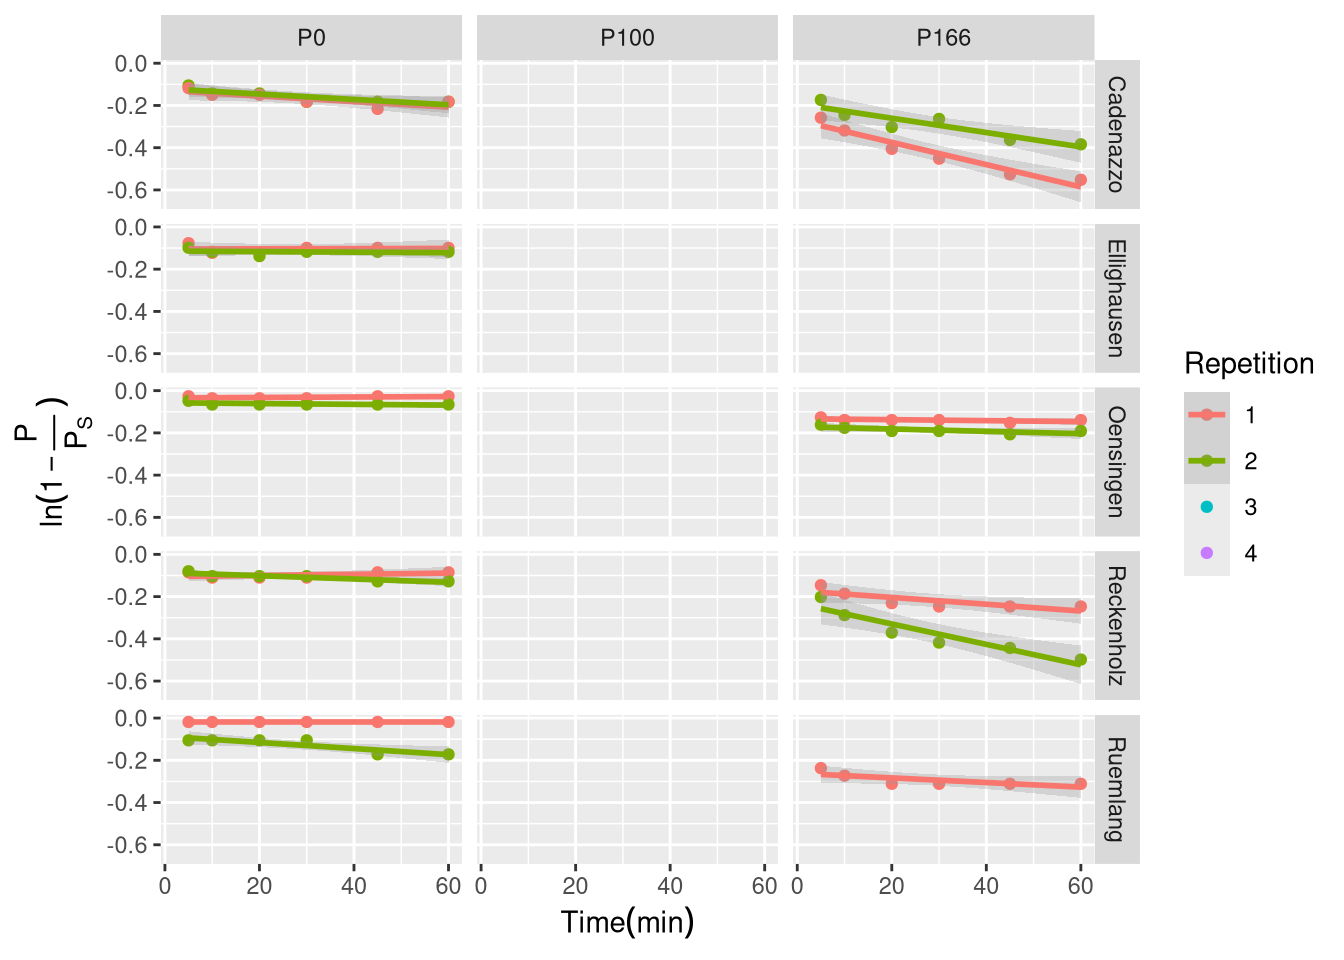

In [ ]:
#| echo: false
#| warning: false
#| message: false
res <- lmList(Y1 ~ t.min. | uid, d[d$Repetition==1|d$Repetition==2,],na.action = na.pass)
summary(res)

If the parameter for the plateau could be estimated directly by using a non-linear non-least-squares model, we could omit the Olsen-measurement in the future.

LG: our nls is very sensitive to moderatly high Pv.mg.L at small time points. Since the … disolves already before we start measureing, we will add 3 min to our time-measurement.

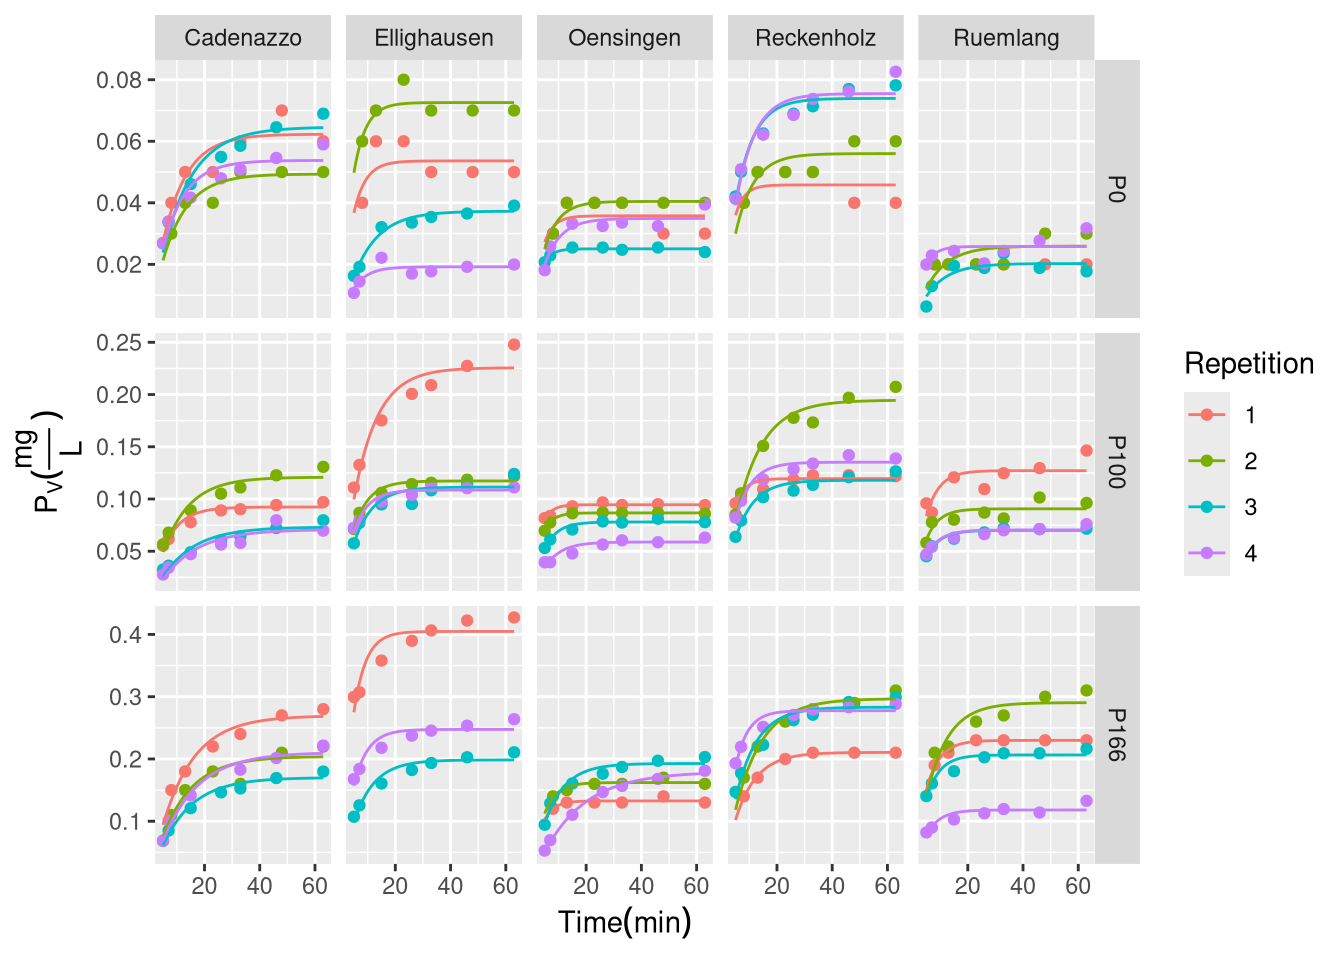

In [ ]:
#| echo: true
#| warning: false
#| message: false

Res <- nlsList(Pv.mg.L. ~ PS * (1 - exp(-k * (t.dt))) | uid, d[, c("Pv.mg.L.", "uid", "t.dt")],  start=list(PS=0.1,k=0.2))
# summary(Res)
# d$nls_pred <- predict(Res)

# Extract coefficients from the nlsList results
nls_coefs <- coef(Res)
nls_coefs$uid <- rownames(nls_coefs)

# Merge coefficients back to the main dataset
d_plot <- merge(d, nls_coefs, by = "uid")

# Most straightforward approach - create curves manually
time_seq <- seq(min(d$t.dt, na.rm = TRUE), max(d$t.dt, na.rm = TRUE), length.out = 100)

# Create prediction data
pred_data <- d_plot %>%
  select(uid, Site, Treatment, Repetition, PS, k) %>%
  distinct() %>%
  crossing(t.dt = time_seq) %>%
  mutate(pred_Pv = PS * (1 - exp(-k * (t.dt))))

# Final plot
p1 <- ggplot() +
  geom_point(data = d_plot, aes(y = Pv.mg.L., x = t.dt, col = Repetition)) +
  geom_line(data = pred_data, aes(x = t.dt, y = pred_Pv, col = Repetition), size = 0.5) +
  facet_grid(Treatment ~ Site,scales = "free_y") +
  labs(x = TeX("$Time (min)$"),
       y = TeX("$P_{V}(\\frac{mg}{L})$")); suppressWarnings(print(p1))

LG: hier machen wir folgendes:

1.  Visualisiere Daten
2.  for k\*PS use sqrt-scale
3.  Erkenne, dass keine offenslichtichen verletzuungen für ein lineares modell vorhanden sind
4.  fitte ordinary linear squares model, with Treatment as the factor of interest and Site as covariate (analougous to paired t-test and equivalent to anova with Site as block factor)
5.  Perform a classical Type II anova (using the car::Anova function)
6.  Perform (post-hoc) TukeyHSD test (using multcomp package)

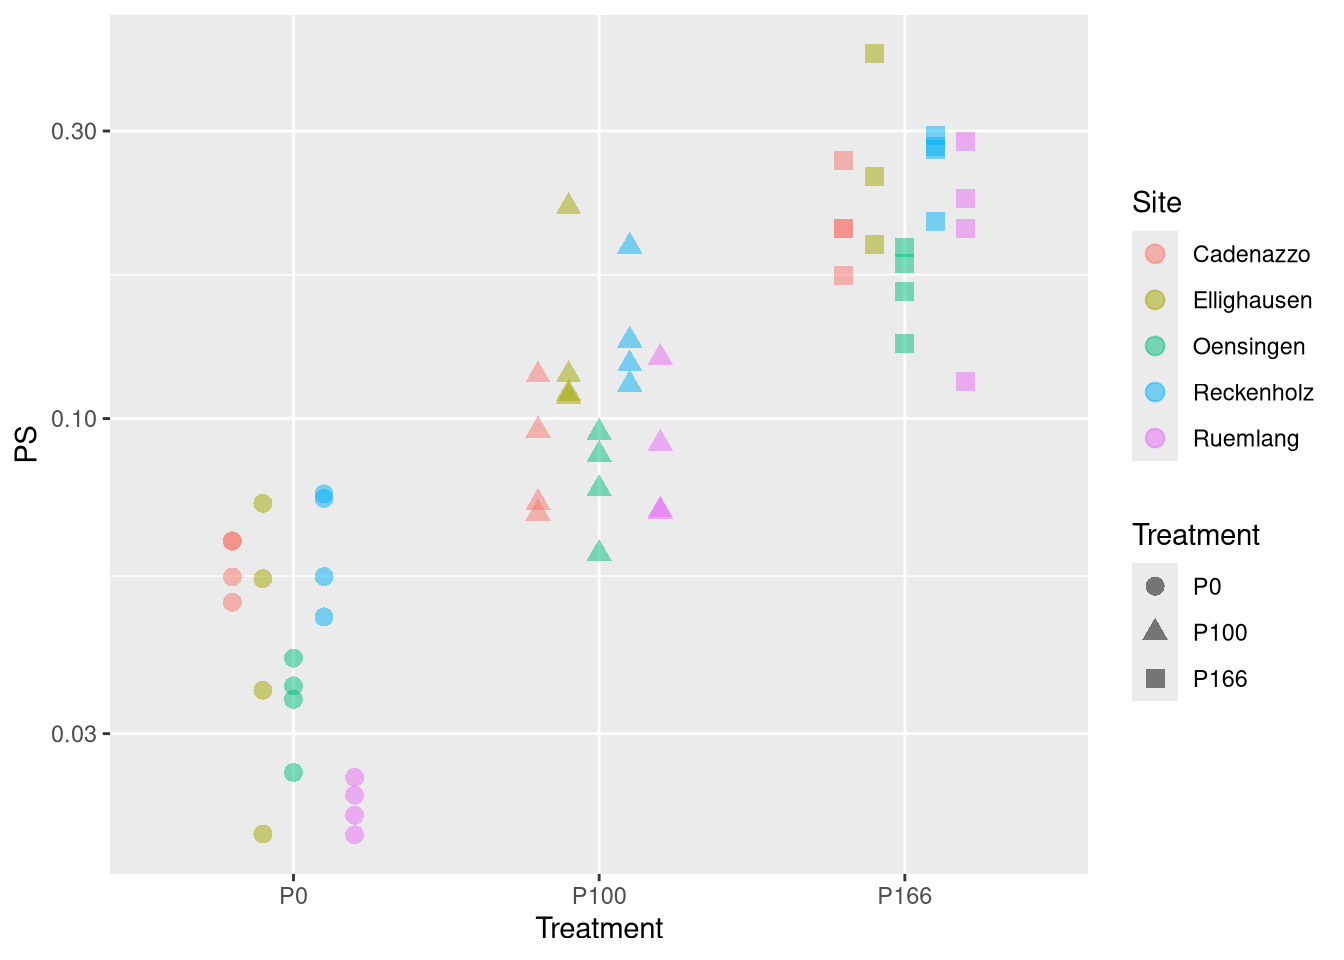

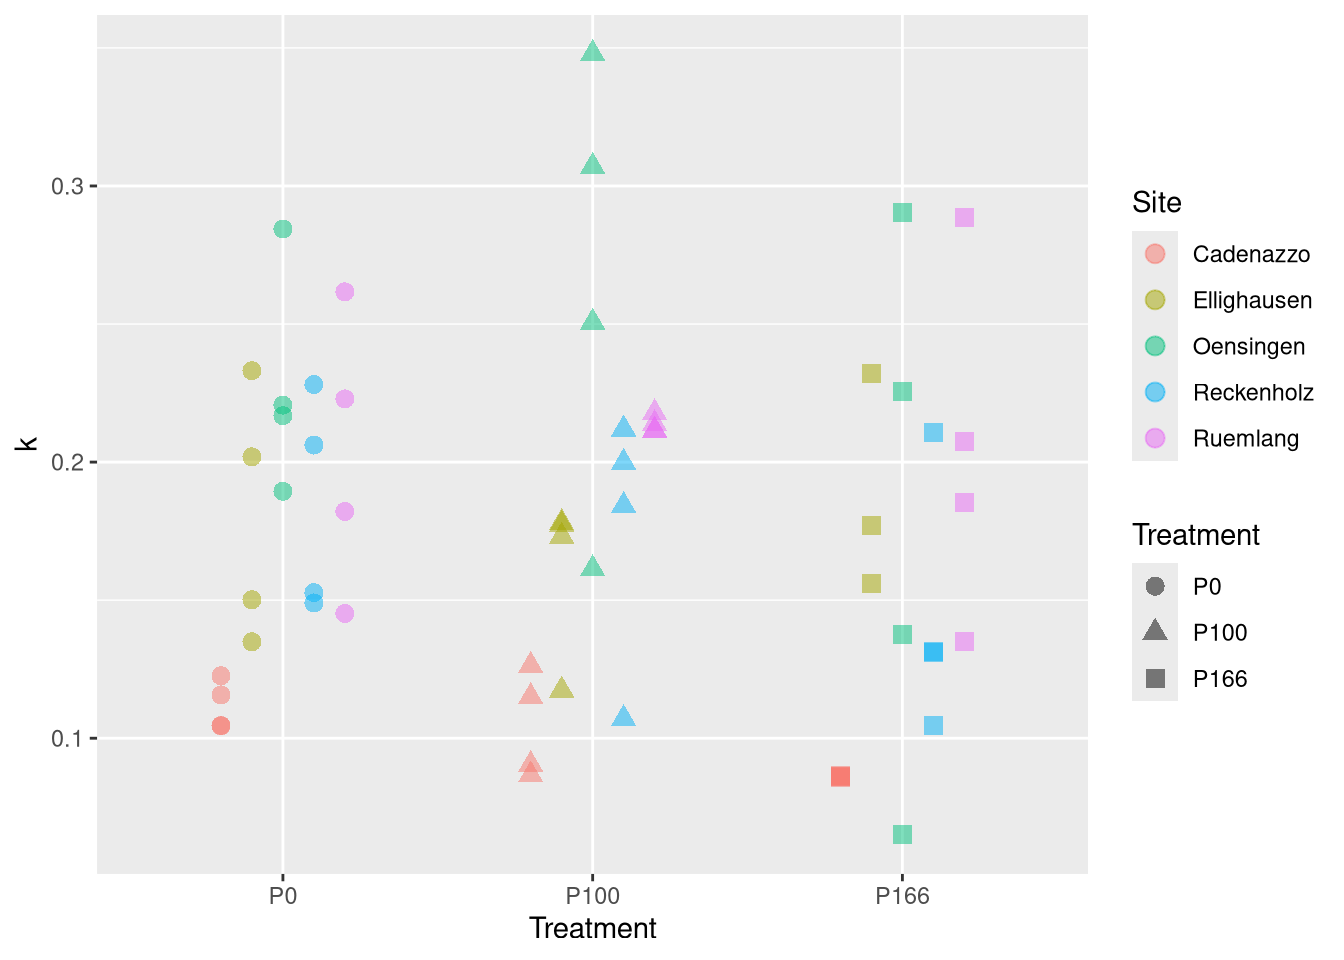

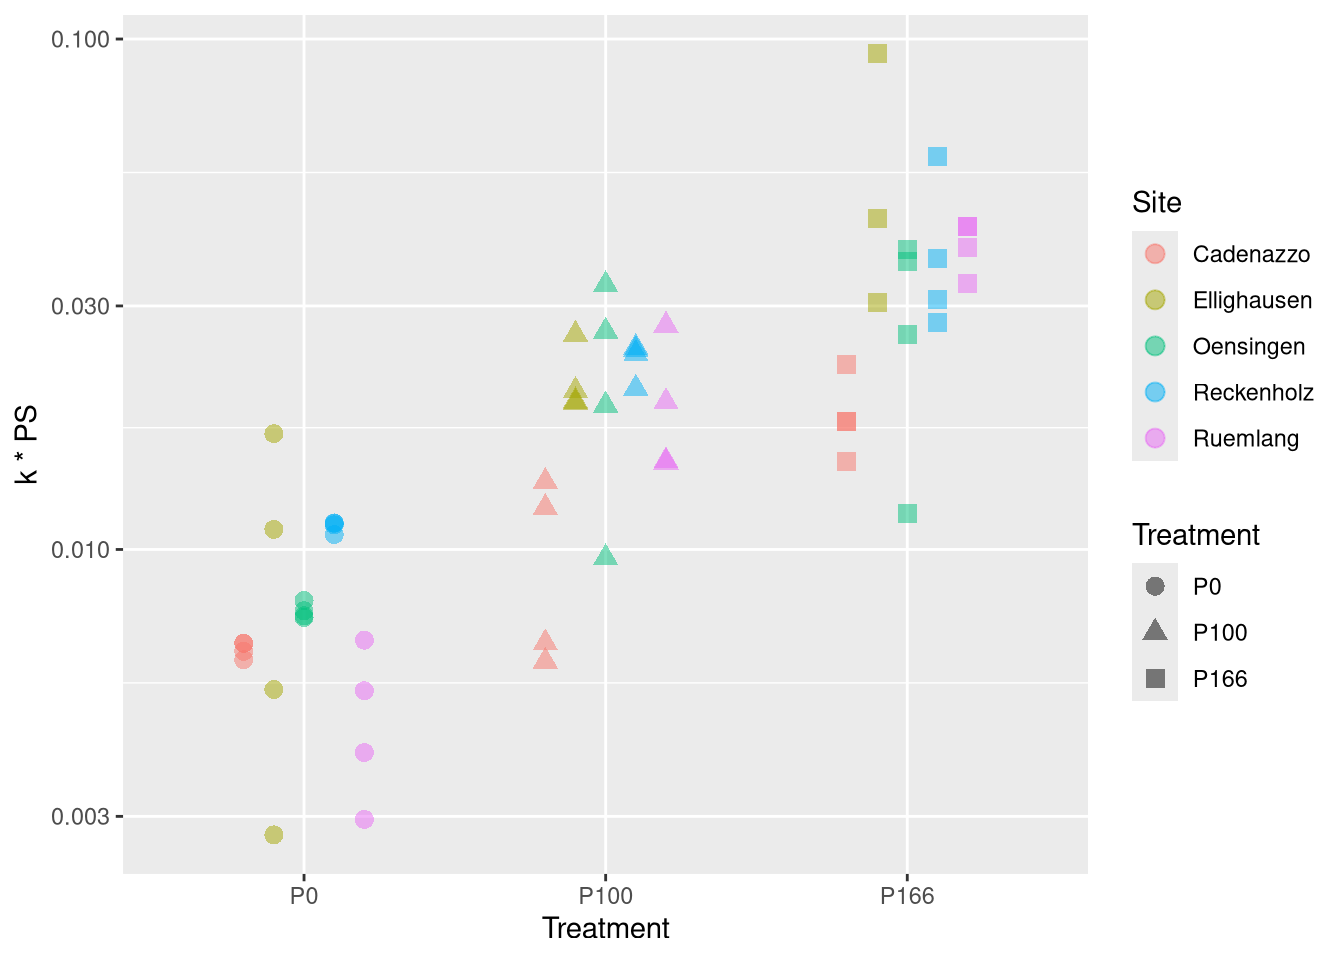

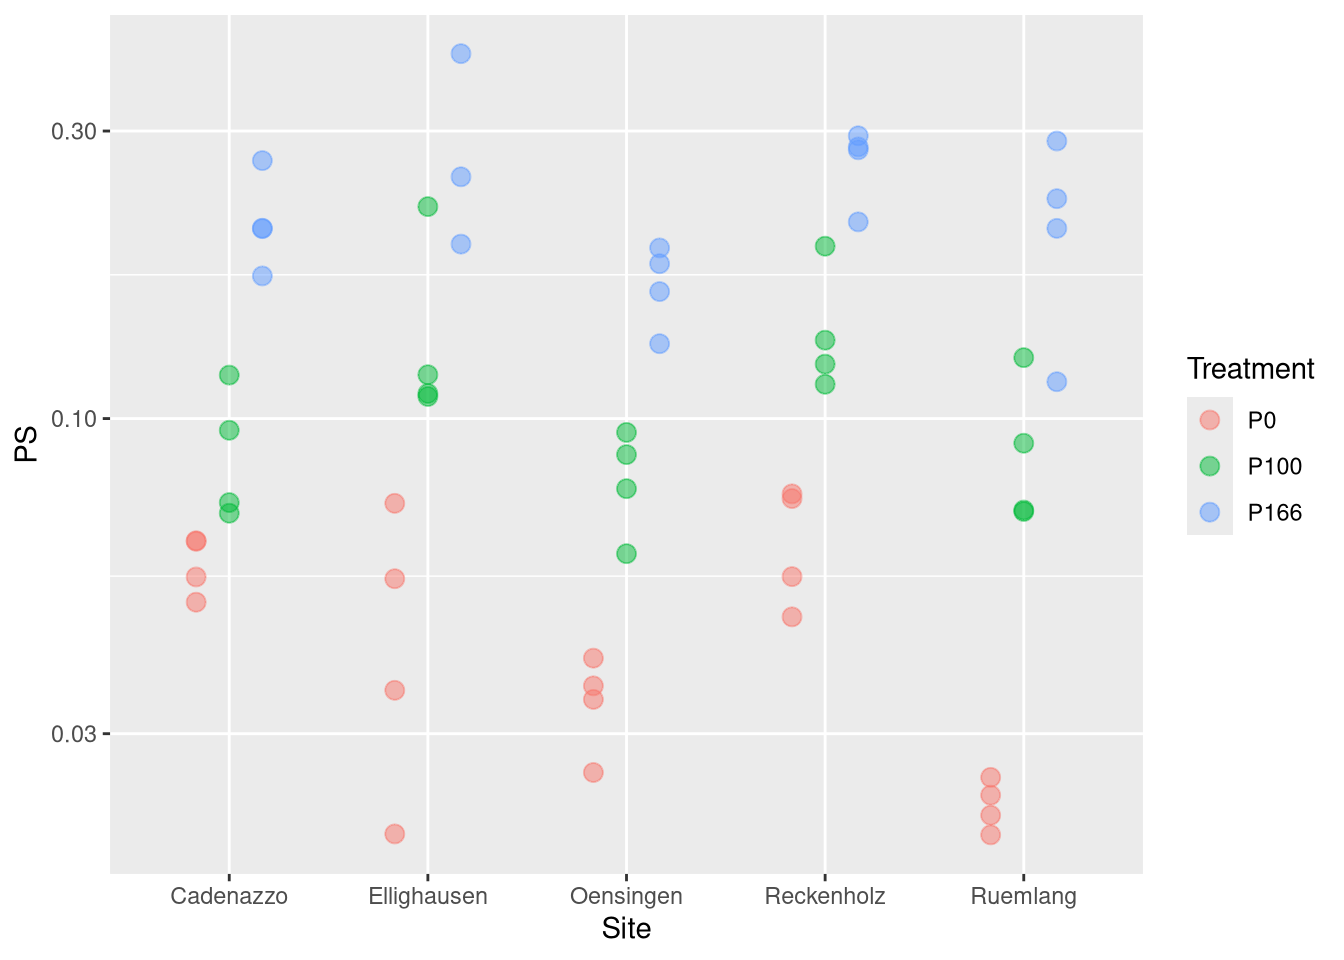

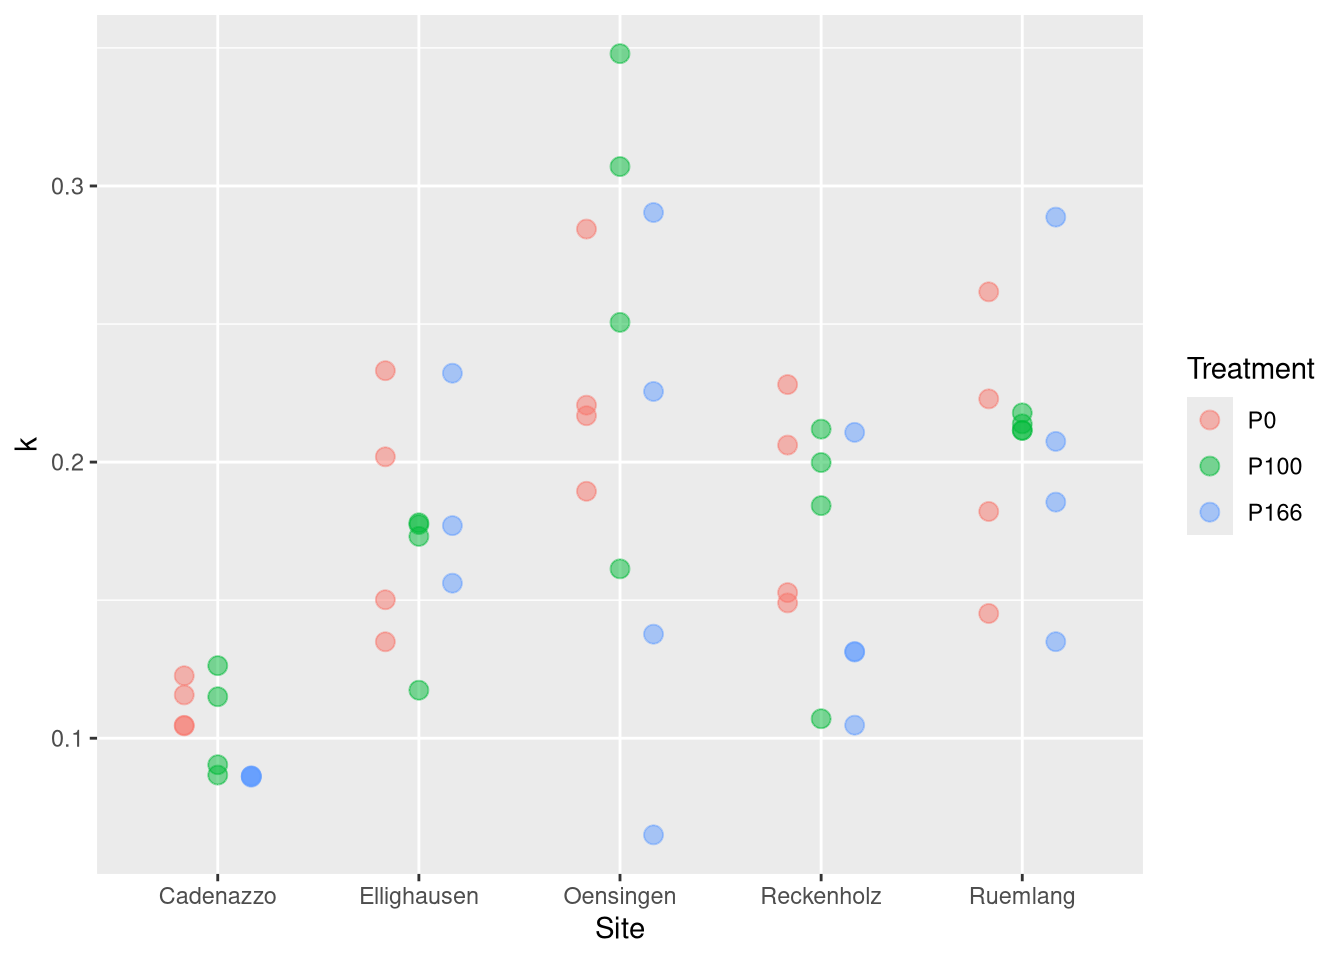

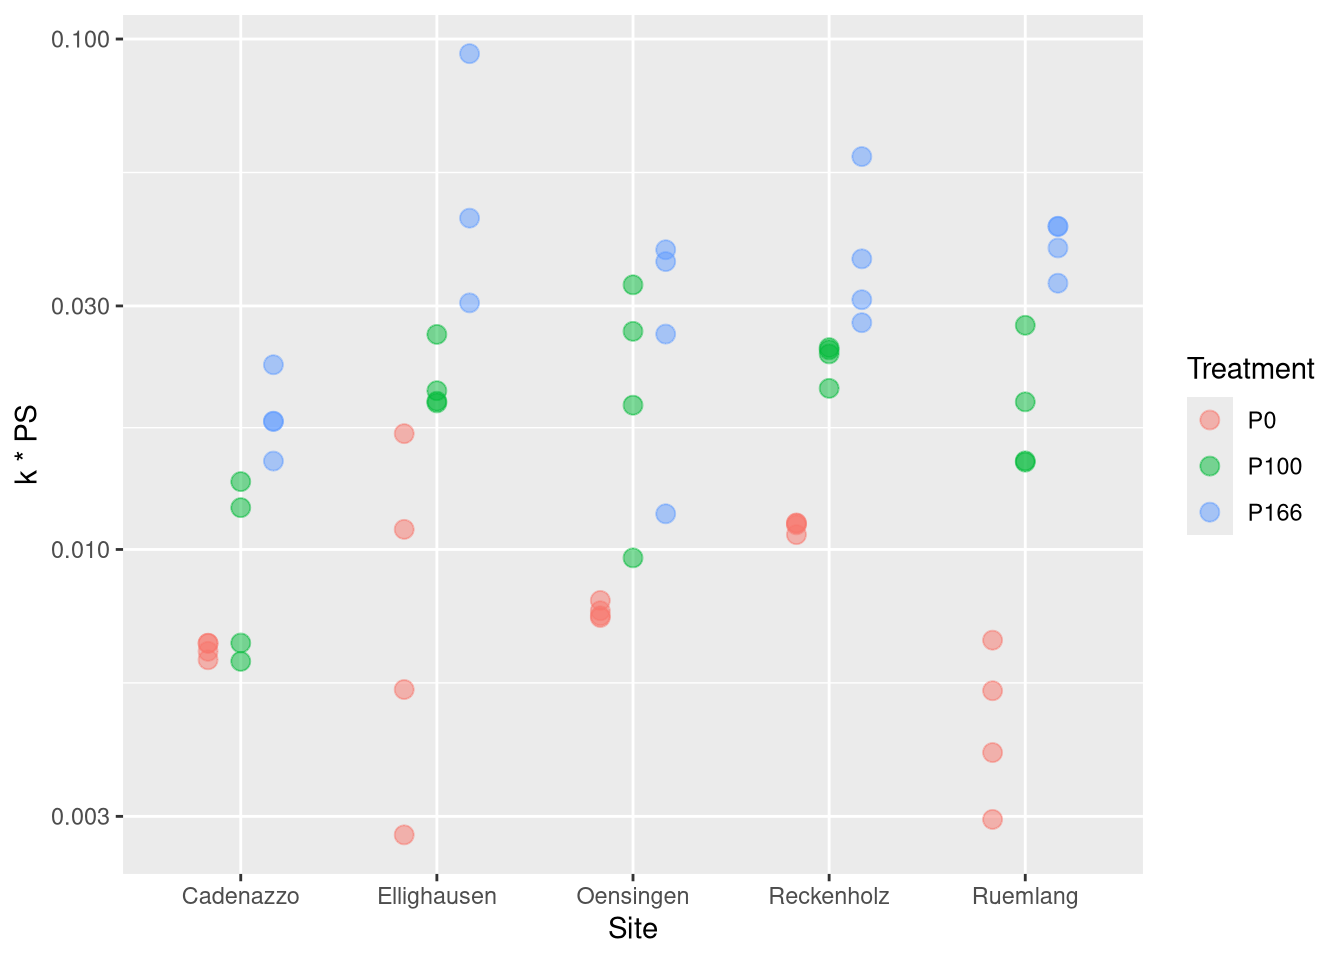

Anova Table (Type II tests)

Response: log(PS)
           Sum Sq Df  F value    Pr(>F)    
Treatment 27.6260  2 154.7655 < 2.2e-16 ***
Site       3.0383  4   8.5104 2.324e-05 ***
Residuals  4.6411 52                       
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = log(PS) ~ Treatment + Site, data = nlme.coef)

Linear Hypotheses:
                 Estimate Std. Error t value Pr(>|t|)    
P100 - P0 == 0    0.91948    0.09447   9.733   <1e-09 ***
P166 - P0 == 0    1.68127    0.09580  17.550   <1e-09 ***
P166 - P100 == 0  0.76179    0.09580   7.952   <1e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Anova Table (Type II tests)

Response: k
            Sum Sq Df F value    Pr(>F)    
Treatment 0.007374  2  1.6124    0.2092    
Site      0.108427  4 11.8547 6.442e-07 ***
Residuals 0.118902 52                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = k ~ Treatment + Site, data = nlme.coef)

Linear Hypotheses:
                  Estimate Std. Error t value Pr(>|t|)
P100 - P0 == 0    0.003111   0.015121   0.206    0.977
P166 - P0 == 0   -0.022243   0.015334  -1.451    0.323
P166 - P100 == 0 -0.025354   0.015334  -1.653    0.233
(Adjusted p values reported -- single-step method)

Anova Table (Type II tests)

Response: I(log(k * PS))
           Sum Sq Df F value    Pr(>F)    
Treatment 22.4177  2 68.5970 2.609e-15 ***
Site       3.9298  4  6.0124 0.0004703 ***
Residuals  8.4969 52                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = I(log(k * PS)) ~ Treatment + Site, data = nlme.coef)

Linear Hypotheses:
                 Estimate Std. Error t value Pr(>|t|)    
P100 - P0 == 0     0.9127     0.1278   7.140  < 1e-04 ***
P166 - P0 == 0     1.5035     0.1296  11.599  < 1e-04 ***
P166 - P100 == 0   0.5908     0.1296   4.558 0.000113 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

In [ ]:
points <- geom_point(position=position_dodge(width=0.5), size = 3, alpha = 0.5)

ggplot(nlme.coef, aes(y=PS  , x=Treatment, col=Site, pch=Treatment)) + points + scale_y_log10()

Results:

1.  for PS Treatment explains a lot, and site not so much. c.f. plot for a monotonous relationship
2.  for k, the Treatment seems to be little relevant

In [ ]:
# new Data set, that gives info about Soil
allP <- tryCatch(readRDS("./data/all_P.rds"))
if (inherits(d, "try-error")){
  allP <- tryCatch(readRDS("~/Documents/Master Thesis/Master-Thesis-P-kinetics/data/all_P.rds"))
}
allP$rep <- allP$rep %>% as.roman() %>% as.integer()
allP$uid <- paste(allP$location,allP$treatment_ID,as.character(allP$rep),sep = "_")

In [ ]:
# 1. merge this with nlme.coef
soil_data_2022 <- allP %>%
  filter(year == 2022) %>%
  select(soil_0_20_P_AAE10, soil_0_20_P_CO2,uid) %>%
  # Wir benennen die Spalten um, um später Konflikte zu vermeiden.
  rename(
    soil_AAE10_from_2022 = soil_0_20_P_AAE10,
    soil_CO2_from_2022 = soil_0_20_P_CO2
  )

 
Stycs_data <- allP %>% filter(year>=2017 & year<=2022) %>% 
  left_join(soil_data_2022, by = "uid")


Stycs_data_2022 <- Stycs_data %>%
  mutate(
    soil_0_20_P_AAE10 = ifelse(year != 2022, soil_AAE10_from_2022, soil_0_20_P_AAE10),
    soil_0_20_P_CO2   = ifelse(year != 2022, soil_CO2_from_2022, soil_0_20_P_CO2)
  ) %>%
  # Die Hilfsspalten werden nicht mehr benötigt und können entfernt werden.
  select(-soil_AAE10_from_2022, -soil_CO2_from_2022)


nlme.coef$kPS <- nlme.coef$k * nlme.coef$PS

D <- merge(nlme.coef, Stycs_data_2022,by = "uid")
D$uuid <- interaction(D$Site, D$treatment_ID, D$rep, D$year, D$crop)

# rm FodderCrop
D <- D[D$crop != "FodderCrop",]

# set wrong 0's to NA
D[D$soil_0_20_P_CO2 %in% c(NA,0), "soil_0_20_P_CO2"] <- NA
D[D$soil_0_20_P_AAE10 %in% c(NA,0), "soil_0_20_P_AAE10"] <- NA
D[D$annual_yield_mp_DM %in% c(NA,0), "annual_yield_mp_DM"] <- NA
D[D$Ymain_rel %in% c(NA,0), "Ymain_rel"] <- NA
D[D$annual_P_uptake %in% c(NA,0), "annual_P_uptake"] <- NA
D[D$annual_P_balance %in% c(NA,0), "annual_P_balance"] <- NA

# add log-transformed versions
# D$k_logPS <- D$k * log(D$PS)
D$kPS_log <- log(D$kPS)
D$PS_log <- log(D$PS)
D$P_AAE10_log <- log(D$soil_0_20_P_AAE10)
D$P_CO2_log <- log(D$soil_0_20_P_CO2)
D$P_AAE10_CO2_loglog <- log(D$soil_0_20_P_AAE10) * log(D$soil_0_20_P_CO2)




D$Site <- as.factor(D$Site)


## Compute Ymain_norm as the median yield of P166 treatment per site, year and crop
# set 0 values of annual_yield_mp_DM, Ymain_rel, annual_P_uptake, annual_P_balance to NA
dd <- aggregate(annual_yield_mp_DM ~ Site+Treatment+year+crop, data=D, median, na.rm = TRUE, na.action = na.pass)
# only keep P166
dd <- dd[dd$Treatment == "P166",]
dd$Treatment <- NULL
tmp <- merge(D, dd, by = c("Site", "year", "crop"), suffixes = c("", ".norm"), sort=FALSE)
nrow(tmp)

[1] 383

[1] "First few rows of the new wide-format IEK data:"

# A tibble: 6 × 41
  uid           n_1  n_10  n_30  n_60 n_1440 n_10080 n_30240 n_1.25  n_31 n_1505
  <chr>       <dbl> <dbl> <dbl> <dbl>  <dbl>   <dbl>   <dbl>  <dbl> <dbl>  <dbl>
1 Cadenazzo…  0.266    NA    NA    NA  0.276   0.286   0.298 NA        NA     NA
2 Cadenazzo… NA        NA    NA    NA  0.287   0.295   0.318  0.272    NA     NA
3 Cadenazzo… NA        NA    NA    NA  0.202   0.220   0.244 NA        NA     NA
4 Cadenazzo…  0.237    NA    NA    NA  0.240   0.246   0.257 NA        NA     NA
5 Ruemlang_…  0.324    NA    NA    NA  0.295   0.283   0.272 NA        NA     NA
6 Ruemlang_…  0.319    NA    NA    NA  0.316   0.305   0.299 NA        NA     NA
# ℹ 30 more variables: E_mod_1 <dbl>, E_mod_10 <dbl>, E_mod_30 <dbl>,
#   E_mod_60 <dbl>, E_mod_1440 <dbl>, E_mod_10080 <dbl>, E_mod_30240 <dbl>,
#   E_mod_1.25 <dbl>, E_mod_31 <dbl>, E_mod_1505 <dbl>, rt_R_1 <dbl>,
#   rt_R_10 <dbl>, rt_R_30 <dbl>, rt_R_60 <dbl>, rt_R_1440 <dbl>,
#   rt_R_10080 <dbl>, rt_R_30240 <dbl>, rt_R_1.25 <

[1] "Column names of the new wide-format IEK data:"

 [1] "uid"         "n_1"         "n_10"        "n_30"        "n_60"       
 [6] "n_1440"      "n_10080"     "n_30240"     "n_1.25"      "n_31"       
[11] "n_1505"      "E_mod_1"     "E_mod_10"    "E_mod_30"    "E_mod_60"   
[16] "E_mod_1440"  "E_mod_10080" "E_mod_30240" "E_mod_1.25"  "E_mod_31"   
[21] "E_mod_1505"  "rt_R_1"      "rt_R_10"     "rt_R_30"     "rt_R_60"    
[26] "rt_R_1440"   "rt_R_10080"  "rt_R_30240"  "rt_R_1.25"   "rt_R_31"    
[31] "rt_R_1505"   "E_exp_1"     "E_exp_10"    "E_exp_30"    "E_exp_60"   
[36] "E_exp_1440"  "E_exp_10080" "E_exp_30240" "E_exp_1.25"  "E_exp_31"   
[41] "E_exp_1505" 

[1] 501

[1] "First few rows of the new wide-format IEK data:"

# A tibble: 6 × 41
  uid           n_1  n_10  n_30  n_60 n_1440 n_10080 n_30240 n_1.25  n_31 n_1505
  <chr>       <dbl> <dbl> <dbl> <dbl>  <dbl>   <dbl>   <dbl>  <dbl> <dbl>  <dbl>
1 Cadenazzo…  0.266    NA    NA    NA  0.276   0.286   0.298 NA        NA     NA
2 Cadenazzo… NA        NA    NA    NA  0.287   0.295   0.318  0.272    NA     NA
3 Cadenazzo… NA        NA    NA    NA  0.202   0.220   0.244 NA        NA     NA
4 Cadenazzo…  0.237    NA    NA    NA  0.240   0.246   0.257 NA        NA     NA
5 Ruemlang_…  0.324    NA    NA    NA  0.295   0.283   0.272 NA        NA     NA
6 Ruemlang_…  0.319    NA    NA    NA  0.316   0.305   0.299 NA        NA     NA
# ℹ 30 more variables: E_mod_1 <dbl>, E_mod_10 <dbl>, E_mod_30 <dbl>,
#   E_mod_60 <dbl>, E_mod_1440 <dbl>, E_mod_10080 <dbl>, E_mod_30240 <dbl>,
#   E_mod_1.25 <dbl>, E_mod_31 <dbl>, E_mod_1505 <dbl>, rt_R_1 <dbl>,
#   rt_R_10 <dbl>, rt_R_30 <dbl>, rt_R_60 <dbl>, rt_R_1440 <dbl>,
#   rt_R_10080 <dbl>, rt_R_30240 <dbl>, rt_R_1.25 <

[1] "Column names of the new wide-format IEK data:"

 [1] "uid"         "n_1"         "n_10"        "n_30"        "n_60"       
 [6] "n_1440"      "n_10080"     "n_30240"     "n_1.25"      "n_31"       
[11] "n_1505"      "E_mod_1"     "E_mod_10"    "E_mod_30"    "E_mod_60"   
[16] "E_mod_1440"  "E_mod_10080" "E_mod_30240" "E_mod_1.25"  "E_mod_31"   
[21] "E_mod_1505"  "rt_R_1"      "rt_R_10"     "rt_R_30"     "rt_R_60"    
[26] "rt_R_1440"   "rt_R_10080"  "rt_R_30240"  "rt_R_1.25"   "rt_R_31"    
[31] "rt_R_1505"   "E_exp_1"     "E_exp_10"    "E_exp_30"    "E_exp_60"   
[36] "E_exp_1440"  "E_exp_10080" "E_exp_30240" "E_exp_1.25"  "E_exp_31"   
[41] "E_exp_1505" 